In [660]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [661]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [662]:
#cd '/content/drive/My Drive/ML-Project'

In [663]:
data_labels=pd.read_csv('csv/label_set.csv',index_col="id")
data_values=pd.read_csv('csv/training_set.csv',index_col="id")
test_data = pd.read_csv('csv/test_set.csv',index_col="id")

In [664]:
X = data_values
test = test_data
y = data_labels

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


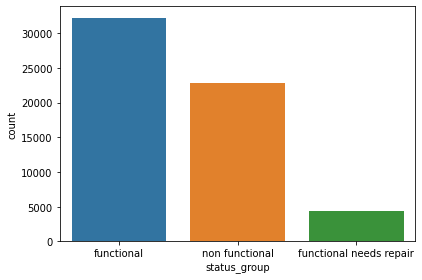

In [665]:
print(y['status_group'].value_counts(normalize=True))
sns.countplot(x='status_group', data=y)
plt.tight_layout()

In [666]:
X.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [667]:
print('\nNull Values in Training \n{}'.format(X.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(test.isnull().sum()))
print('\nNull Values in Labels \n{}'.format(y.isnull().sum()))


print('\nDuplicated values in train {}'.format(X.duplicated().sum()))
print('Duplicated values in test {}'.format(test.duplicated().sum()))


Null Values in Training 
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group

In [668]:
X.dtypes

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

In [669]:
train_labels = X.join(y)

# Drop Duplicates

In [670]:
train_labels.drop_duplicates(subset=train_labels.columns, keep="first", inplace=True)

In [671]:
print('\nDuplicated values in train {}'.format(train_labels.duplicated().sum()))


Duplicated values in train 0


In [672]:
X = train_labels.iloc[:,:-1]
X.head(10)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump


# Imputations

In [673]:
X['train']=1
test['train']=0

In [674]:
train_test = X.append(test)
print(train_test.shape)
train_test.tail(10)

(74214, 40)


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,train
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
59757,0.0,2013-02-24,Villagers,1291,Villagers,35.345384,-9.831170e+00,Kwa Reonard,0,Lake Nyasa,Tuliani,Ruvuma,10,2,Songea Rural,Wino,0,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa wino,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,0
64579,0.0,2012-10-26,Dwsp,0,DWE,0.000000,-2.000000e-08,Iguna,0,Lake Victoria,Nyerere,Shinyanga,17,1,Bariadi,Kasoli,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,0
57731,600.0,2013-01-27,Isf,808,DWE,29.740224,-4.882705e+00,Hongera,0,Lake Tanganyika,Mzizini A,Kigoma,16,3,Kigoma Rural,Simbo,230,True,GeoData Consultants Ltd,WUG,Mkongoro Two,True,2009,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,0
65541,0.0,2013-02-04,Oxfarm,1641,OXFARM,29.768139,-4.480618e+00,Mwandami,0,Lake Tanganyika,Kosoro,Kigoma,16,2,Kigoma Rural,Mkigo,1400,True,GeoData Consultants Ltd,Water authority,NaN,False,1995,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,other,other,0
68174,0.0,2012-11-07,Netherlands,0,DWE,34.096878,-3.079689e+00,Ikanayugu,0,Lake Victoria,Maganju,Shinyanga,17,2,Maswa,Ipililo,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,0
39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841e+00,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,0
18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428e+00,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,0
28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587e+00,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,0
33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-1.058416e+01,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,0


In [675]:
for column in train_test.columns:
  if(column!='train'):
      print(column+" has "+str((train_test[column]==0).sum(axis=0))+ " zero values")
      print(column+" has "+str(train_test[column].isnull().sum())+ " null values")
      print('\n')

amount_tsh has 52013 zero values
amount_tsh has 0 null values


date_recorded has 0 zero values
date_recorded has 0 null values


funder has 0 zero values
funder has 4504 null values


gps_height has 25613 zero values
gps_height has 0 null values


installer has 0 zero values
installer has 4532 null values


longitude has 2234 zero values
longitude has 0 null values


latitude has 0 zero values
latitude has 0 null values


wpt_name has 0 zero values
wpt_name has 0 null values


num_private has 73263 zero values
num_private has 0 null values


basin has 0 zero values
basin has 0 null values


subvillage has 0 zero values
subvillage has 470 null values


region has 0 zero values
region has 0 null values


region_code has 0 zero values
region_code has 0 null values


district_code has 27 zero values
district_code has 0 null values


lga has 0 zero values
lga has 0 null values


ward has 0 zero values
ward has 0 null values


population has 26798 zero values
population has 0 null values




In [676]:
train_test.isnull().sum()
train_test.population.min()
train_test['gps_height'].replace(0.0, np.nan, inplace=True)
train_test['population'].replace(0.0, np.nan, inplace=True)
train_test['amount_tsh'].replace(0.0, np.nan, inplace=True)
train_test.isnull().sum()

amount_tsh               52013
date_recorded                0
funder                    4504
gps_height               25613
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population               26798
public_meeting            4135
recorded_by                  0
scheme_management         4846
scheme_name              35231
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [677]:
train_test["gps_height"].fillna(train_test.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
train_test["gps_height"].fillna(train_test.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
train_test["gps_height"].fillna(train_test["gps_height"].mean(), inplace=True)
train_test["population"].fillna(train_test.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
train_test["population"].fillna(train_test.groupby(['region'])["population"].transform("median"), inplace=True)
train_test["population"].fillna(train_test["population"].median(), inplace=True)
train_test["amount_tsh"].fillna(train_test.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
train_test["amount_tsh"].fillna(train_test.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
train_test["amount_tsh"].fillna(train_test["amount_tsh"].median(), inplace=True)
train_test.isnull().sum()

amount_tsh                   0
date_recorded                0
funder                    4504
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4135
recorded_by                  0
scheme_management         4846
scheme_name              35231
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [678]:
for column in train_test.columns:
  if(column!='train'):
      print(column+" has "+str((train_test[column]==0).sum(axis=0))+ " zero values")
      print(column+" has "+str(train_test[column].isnull().sum())+ " null values")
      print('\n')

amount_tsh has 0 zero values
amount_tsh has 0 null values


date_recorded has 0 zero values
date_recorded has 0 null values


funder has 0 zero values
funder has 4504 null values


gps_height has 0 zero values
gps_height has 0 null values


installer has 0 zero values
installer has 4532 null values


longitude has 2234 zero values
longitude has 0 null values


latitude has 0 zero values
latitude has 0 null values


wpt_name has 0 zero values
wpt_name has 0 null values


num_private has 73263 zero values
num_private has 0 null values


basin has 0 zero values
basin has 0 null values


subvillage has 0 zero values
subvillage has 470 null values


region has 0 zero values
region has 0 null values


region_code has 0 zero values
region_code has 0 null values


district_code has 27 zero values
district_code has 0 null values


lga has 0 zero values
lga has 0 null values


ward has 0 zero values
ward has 0 null values


population has 0 zero values
population has 0 null values


public_meeti

*gps_height, population and amount_tsh done*

In [679]:
train_test.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,train
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390.000000,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109.0,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
8776,200.0,2013-03-06,Grumeti,1399.000000,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280.0,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1
34310,25.0,2013-02-25,Lottery Club,686.000000,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250.0,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,1
67743,50.0,2013-01-28,Unicef,263.000000,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58.0,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
19728,250.0,2011-07-13,Action In A,1056.105533,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,200.0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1


In [680]:
train_test['longitude'].replace(0.0, np.nan, inplace=True)
train_test['latitude'].replace(0.0, np.nan, inplace=True)
train_test['construction_year'].replace(0.0, np.nan, inplace=True)

In [681]:
train_test["latitude"].fillna(train_test.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)

In [682]:
train_test["longitude"].fillna(train_test.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)

In [683]:
train_test["longitude"].fillna(train_test.groupby(['region'])["longitude"].transform("mean"), inplace=True)

In [684]:
for column in train_test.columns:
  if(column!='train'):
      print(column+" has "+str((train_test[column]==0).sum(axis=0))+ " zero values")
      print(column+" has "+str(train_test[column].isnull().sum())+ " null values")
      print('\n')

amount_tsh has 0 zero values
amount_tsh has 0 null values


date_recorded has 0 zero values
date_recorded has 0 null values


funder has 0 zero values
funder has 4504 null values


gps_height has 0 zero values
gps_height has 0 null values


installer has 0 zero values
installer has 4532 null values


longitude has 0 zero values
longitude has 0 null values


latitude has 0 zero values
latitude has 0 null values


wpt_name has 0 zero values
wpt_name has 0 null values


num_private has 73263 zero values
num_private has 0 null values


basin has 0 zero values
basin has 0 null values


subvillage has 0 zero values
subvillage has 470 null values


region has 0 zero values
region has 0 null values


region_code has 0 zero values
region_code has 0 null values


district_code has 27 zero values
district_code has 0 null values


lga has 0 zero values
lga has 0 null values


ward has 0 zero values
ward has 0 null values


population has 0 zero values
population has 0 null values


public_meeting 

*longitude and latitude done*

In [685]:
train_test["construction_year"].fillna(train_test.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
train_test["construction_year"].fillna(train_test.groupby(['region'])["construction_year"].transform("median"), inplace=True)
train_test["construction_year"].fillna(train_test.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
train_test["construction_year"].fillna(train_test["construction_year"].median(), inplace=True)

In [686]:
for column in train_test.columns:
  if(column!='train'):
    if((train_test[column]==0).sum(axis=0) != 0 or train_test[column].isnull().sum() != 0):
      print(column+" has "+str((train_test[column]==0).sum(axis=0))+ " zero values")
      print(column+" has "+str(train_test[column].isnull().sum())+ " null values")
      print('\n')

funder has 0 zero values
funder has 4504 null values


installer has 0 zero values
installer has 4532 null values


num_private has 73263 zero values
num_private has 0 null values


subvillage has 0 zero values
subvillage has 470 null values


district_code has 27 zero values
district_code has 0 null values


public_meeting has 6345 zero values
public_meeting has 4135 null values


scheme_management has 0 zero values
scheme_management has 4846 null values


scheme_name has 0 zero values
scheme_name has 35231 null values


permit has 21829 zero values
permit has 3793 null values




In [687]:
train_test['funder'].replace(to_replace=('0', 'nan', None), value='other', inplace=True)

In [688]:
train_test['installer'].replace(to_replace=('0', 'nan', '-', None), value='other', inplace=True)

In [689]:
for column in train_test.columns:
  if(column!='train'):
    if((train_test[column]==0).sum(axis=0) != 0 or train_test[column].isnull().sum() != 0):
      print(column+" has "+str((train_test[column]==0).sum(axis=0))+ " zero values")
      print(column+" has "+str(train_test[column].isnull().sum())+ " null values")
      print('\n')

num_private has 73263 zero values
num_private has 0 null values


subvillage has 0 zero values
subvillage has 470 null values


district_code has 27 zero values
district_code has 0 null values


public_meeting has 6345 zero values
public_meeting has 4135 null values


scheme_management has 0 zero values
scheme_management has 4846 null values


scheme_name has 0 zero values
scheme_name has 35231 null values


permit has 21829 zero values
permit has 3793 null values




In [690]:
subvillage_region_code = train_test.groupby(['region_code'])['subvillage'].agg(pd.Series.mode)
scheme_name_region_code = train_test.groupby(['region'])['scheme_name'].agg(pd.Series.mode)
scheme_management_region_code = train_test.groupby(['region'])['scheme_management'].agg(pd.Series.mode)

In [691]:
def impute_mode(df,map_df,col,grouped_col):
  df.loc[df[col].isnull(),[col]] = df[df[col].isnull()].apply(
      lambda row: map_df.loc[row[grouped_col]][0],axis=1
  )

In [692]:
impute_mode(train_test,subvillage_region_code,'subvillage','region_code')
impute_mode(train_test,scheme_name_region_code,'scheme_name','region')
impute_mode(train_test,scheme_management_region_code,'scheme_management','region')

In [693]:
for column in train_test.columns:
  if(column!='train'):
    if((train_test[column]==0).sum(axis=0) != 0 or train_test[column].isnull().sum() != 0):
      print(column+" has "+str((train_test[column]==0).sum(axis=0))+ " zero values")
      print(column+" has "+str(train_test[column].isnull().sum())+ " null values")
      print('\n')

num_private has 73263 zero values
num_private has 0 null values


district_code has 27 zero values
district_code has 0 null values


public_meeting has 6345 zero values
public_meeting has 4135 null values


permit has 21829 zero values
permit has 3793 null values




*subvillage,scheme name and region are done*

*In public meeting and permit columns,
0 means false and 1 means true.*

In [694]:
train_test['public_meeting'].value_counts()

True     63734
False     6345
Name: public_meeting, dtype: int64

In [695]:
public_meeting_median = train_test['public_meeting'].median()
permit_median = train_test['permit'].median()

In [696]:
train_test.loc[train_test['public_meeting'].isnull(), 'public_meeting'] = public_meeting_median
train_test.loc[train_test['permit'].isnull(), 'permit'] = permit_median

In [697]:
train_test['public_meeting'].value_counts()

True     67869
False     6345
Name: public_meeting, dtype: int64

*num_private and district code zero values does not impute*

***clustering***

In [698]:
# clusturing of long and lattitude\
from sklearn.cluster import KMeans
import seaborn as sns
RANDOM_SEED = 42
df_l = train_test.loc[:, ["population", "latitude", "longitude"]]
kmeans = KMeans(n_clusters=8, random_state=RANDOM_SEED)
df_l["Cluster"] = kmeans.fit_predict(df_l)
df_l["Cluster"] = df_l["Cluster"].astype("category")

df_l.head()

,population,latitude,longitude,Cluster
id,,,,
69572,109.0,-9.856322,34.938093,0
8776,280.0,-2.147466,34.698766,4
34310,250.0,-3.821329,37.460664,4
67743,58.0,-11.155298,38.486161,0
19728,200.0,-1.825359,31.130847,4


In [699]:
train_test["Cluster"] = df_l["Cluster"].astype("object")

In [700]:
train_test.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,train
count,74214.000000,74214.000000,74214.000000,7.421400e+04,74214.000000,74214.000000,74214.000000,74214.000000,74214.000000,74214.000000
mean,632.491222,1056.105533,35.106161,-5.704513e+00,0.462554,15.264209,5.630474,290.256919,1998.391368,0.799903
std,3049.229674,507.946843,2.582008,2.943043e+00,11.540672,17.513055,9.643629,461.898402,10.478908,0.400075
min,0.200000,-90.000000,29.607122,-1.164944e+01,0.000000,1.000000,0.000000,1.000000,1960.000000,0.000000
25%,50.000000,834.000000,33.267769,-8.526564e+00,0.000000,5.000000,2.000000,80.000000,1995.000000,1.000000
50%,250.000000,1056.105533,34.908991,-5.027726e+00,0.000000,12.000000,3.000000,200.000000,2001.000000,1.000000
75%,500.000000,1350.539171,37.182563,-3.325629e+00,0.000000,17.000000,5.000000,420.000000,2005.000000,1.000000
max,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,1.000000


# Log Normalize population

In [701]:
train_test.population = train_test.population.apply(lambda x: np.log10(x+1))
train_test.amount_tsh = train_test.amount_tsh.apply(lambda x: np.log10(x+1))

In [702]:
train_test['public_meeting'].value_counts()

True     67869
False     6345
Name: public_meeting, dtype: int64

# Re Split Data

In [703]:
X = train_test[train_test["train"] == 1]
test = train_test[train_test["train"] == 0]

In [704]:
X.drop(["train"], axis=1, inplace=True)
test.drop(["train"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [705]:
print(X.shape)
print(test.shape)

(59364, 40)
(14850, 40)


In [706]:
print('\nNull Values in Training \n{}'.format(X.isnull().sum()))
print('\nNull Values in Training \n{}'.format(test.isnull().sum()))


Null Values in Training 
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
so

In [707]:
X1 = X.merge(y, on='id')

In [708]:
X1.shape

(59364, 41)

In [709]:
y = X1["status_group"]

In [710]:
X_y = X.join(y)
X_y.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Cluster,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,3.778224,2011-03-14,Roman,1390.000000,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,2.041393,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,functional
8776,2.303196,2013-03-06,Grumeti,1399.000000,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,2.448706,1,GeoData Consultants Ltd,Other,M,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,4,functional
34310,1.414973,2013-02-25,Lottery Club,686.000000,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,2.399674,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,4,functional
67743,1.707570,2013-01-28,Unicef,263.000000,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,1.770852,True,GeoData Consultants Ltd,VWC,B,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0,non functional
19728,2.399674,2011-07-13,Action In A,1056.105533,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,2.303196,True,GeoData Consultants Ltd,V,K,True,2003.0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,4,functional


# New Features

In [711]:
X_y['date_recorded'] = pd.to_datetime(X_y['date_recorded'])
X_y['year'] = X_y['date_recorded'].dt.year
X_y['month'] = X_y['date_recorded'].dt.month
X_y['operational_year'] = X_y.date_recorded.dt.year - X_y.construction_year
X_y.drop(columns = 'date_recorded', inplace = True)

In [712]:
test['date_recorded'] = pd.to_datetime(test['date_recorded'])
test['year'] = test['date_recorded'].dt.year
test['month'] = test['date_recorded'].dt.month
test['operational_year'] = test.date_recorded.dt.year - test.construction_year
test.drop(columns = 'date_recorded', inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [713]:
print(X_y.shape)
print(test.shape)

(59364, 43)
(14850, 42)


# Cat boost

In [714]:
X_y.dtypes

amount_tsh               float64
funder                    object
gps_height               float64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population               float64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year        float64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_gr

In [715]:
X_y.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Cluster,status_group,year,month,operational_year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,3.778224,Roman,1390.000000,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,2.041393,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,functional,2011,3,12.0
8776,2.303196,Grumeti,1399.000000,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,2.448706,1,GeoData Consultants Ltd,Other,M,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,4,functional,2013,3,3.0
34310,1.414973,Lottery Club,686.000000,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,2.399674,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,4,functional,2013,2,4.0
67743,1.707570,Unicef,263.000000,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,1.770852,True,GeoData Consultants Ltd,VWC,B,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0,non functional,2013,1,27.0
19728,2.399674,Action In A,1056.105533,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,2.303196,True,GeoData Consultants Ltd,V,K,True,2003.0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,4,functional,2011,7,8.0


In [716]:
categorical_cols = ['funder', 'installer','wpt_name', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group']

In [717]:
X_selected = X_y.drop("status_group", axis=1)

In [718]:
X_selected[categorical_cols] = X_selected[categorical_cols].astype('category')
test[categorical_cols] = test[categorical_cols].astype('category')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [719]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state = RANDOM_SEED, test_size=0.1,  stratify=y)

In [720]:
!pip install catboost

In [721]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
        max_ctr_complexity=5,
        task_type='CPU',
        iterations=100,
        eval_metric='AUC',
        od_type='Iter',
        od_wait=500,
        cat_features = categorical_cols,
        verbose=False
    )

In [722]:
X_selected.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Cluster,year,month,operational_year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,3.778224,Roman,1390.000000,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,2.041393,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,2011,3,12.0
8776,2.303196,Grumeti,1399.000000,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,2.448706,True,GeoData Consultants Ltd,Other,M,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,4,2013,3,3.0
34310,1.414973,Lottery Club,686.000000,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,2.399674,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,4,2013,2,4.0
67743,1.707570,Unicef,263.000000,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,1.770852,True,GeoData Consultants Ltd,VWC,B,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0,2013,1,27.0
19728,2.399674,Action In A,1056.105533,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,2.303196,True,GeoData Consultants Ltd,V,K,True,2003.0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,4,2011,7,8.0


In [723]:
model.fit(X_train, y_train)

In [724]:
y_pred = model.predict(X_test) 

In [725]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

#0.809499747347145 - 100 (0.1 test)
#0.8096681825837966 - without clustering and year + month
#0.8064679130874179 - 100 (0.1 test) without clustering
#0.8093313121104935 - with clustering, without year + month
#0.810173488293751 - 100 (0.1 test) clustering/all


#0.8143843692100388 - 1000 (0.1 test) (0.8180)
#0.8152415605417425 - 1000 (0.25 test)
#0.8116894054236147 - 1000 (0.1 test) - without doing zero value imputation (0.8183)
#0.8152265453932963 - 1000(0.1 test) -  with operational year(remove year, month)

   Accuracy: 0.810173488293751
                         precision    recall  f1-score   support

             functional       0.80      0.90      0.85      3224
functional needs repair       0.61      0.31      0.41       431
         non functional       0.85      0.77      0.81      2282

               accuracy                           0.81      5937
              macro avg       0.75      0.66      0.69      5937
           weighted avg       0.80      0.81      0.80      5937



# Train on main Dataset

In [727]:
model2 = CatBoostClassifier(
        max_ctr_complexity=5,
        task_type='CPU',
        iterations=1000,
        eval_metric='AUC',
        od_type='Iter',
        od_wait=500,
        cat_features = categorical_cols,
        verbose=False
    )

In [728]:
model2.fit(X_selected,y)

In [729]:
pred = model2.predict(test)

In [730]:
df_predictions = pd.DataFrame(
    pred, 
    index=test.index, 
    columns=['status_group']
)
df_predictions.to_csv('/content/drive/My Drive/ML-Project/my-solution/result-1000-all.csv')